In [84]:
import pvlib.pvsystem
!pip install pvlib

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

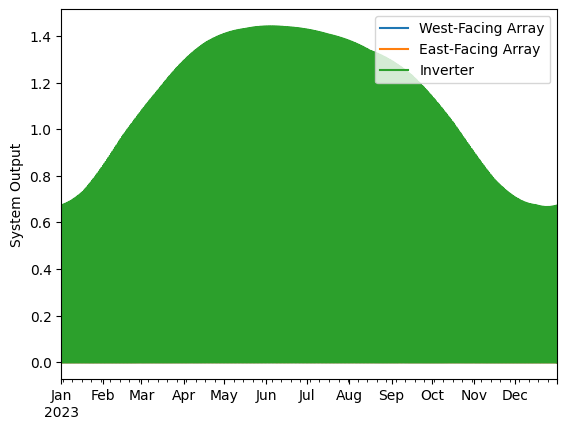

In [86]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt

array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

arrays = [
    pvsystem.Array(pvsystem.FixedMount(30, 270), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(30, 90), name='East-Facing Array',
                   **array_kwargs),
]
loc = location.Location(40, -80)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2023-01-01 00:00', '2023-12-31 23:59', freq='1H',
                      tz='Etc/GMT')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
#for array, pdc in zip(system.arrays, mc.results.dc):
#    pdc.plot(label=f'{array.name}')
mc.results.ac.plot(label='Inverter')
plt.ylabel('System Output')
plt.legend()
plt.show()